In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.externals import joblib
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
df = pd.read_csv('/content/drive/MyDrive/college/college.csv')
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [4]:
df.groupby('Stream').agg('count')

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Stream,,,,,,,
Civil,317,317,317,317,317,317,317
Computer Science,776,776,776,776,776,776,776
Electrical,334,334,334,334,334,334,334
Electronics And Communication,424,424,424,424,424,424,424
Information Technology,691,691,691,691,691,691,691
Mechanical,424,424,424,424,424,424,424


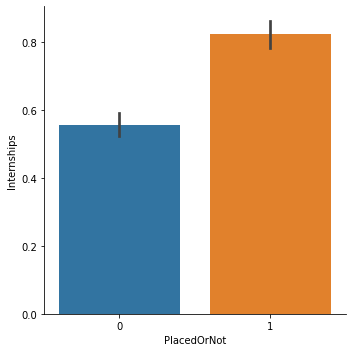

In [16]:
sns.catplot(x="PlacedOrNot", y="Internships", kind="bar", data=df)

In [21]:
df["Gender"].replace({"Male": 0, "Female": 1}, inplace=True)

In [23]:
df["Stream"].replace({"Computer Science": 0, "Electronics And Communication": 1,"Information Technology":2,"Mechanical":3,"Electrical":4, "Civil":5}, inplace=True)

In [26]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,0,1,1,8,1,1,1
1,21,1,0,0,7,1,1,1
2,22,1,2,1,6,0,0,1
3,21,0,2,0,8,0,1,1
4,22,0,3,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,0,2,0,7,0,0,0
2962,23,0,3,1,7,1,0,0
2963,22,0,2,1,7,0,0,0
2964,22,0,0,1,7,0,0,0


In [28]:
corr_matrix = df.corr()
corr_matrix['PlacedOrNot'].sort_values(ascending = False)

PlacedOrNot          1.000000
CGPA                 0.588648
Internships          0.179334
Age                  0.046943
Gender               0.006705
HistoryOfBacklogs   -0.022337
Hostel              -0.038182
Stream              -0.078599
Name: PlacedOrNot, dtype: float64

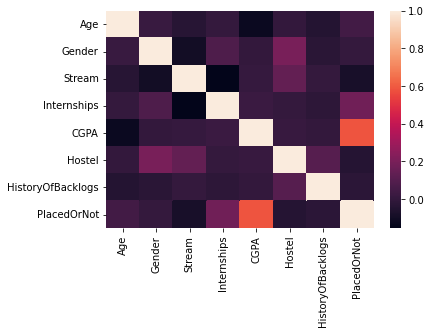

In [29]:
sns.heatmap(corr_matrix)

In [75]:
df1 = df.drop(columns=['Gender', 'HistoryOfBacklogs', 'Hostel'])
df1.head(10)

,Age,Stream,Internships,CGPA,PlacedOrNot
0,22,1,1,8,1
1,21,0,0,7,1
2,22,2,1,6,1
3,21,2,0,8,1
4,22,3,0,8,1
5,22,1,0,6,0
6,21,0,0,7,0
7,21,2,1,7,0
8,21,0,2,6,1
9,21,0,1,6,0


Extracting X and Y value for traing the dataset.

In [31]:
x = df.drop(columns=['Gender', 'HistoryOfBacklogs', 'Hostel','PlacedOrNot'])
y = df['PlacedOrNot']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [33]:
model_params = {
    'linear_regression': {
        'model': LinearRegression(),
        'params' : {
        }  
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params' : {
        }  
    },
    'Lasso': {
        'model': Lasso(),
        'params' : {
        }  
    },
    'Ridge': {
        'model': Ridge(),
        'params' : {
            'alpha':[0.1]
        }  
    },
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [34]:
scores = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
models_used = pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [35]:
models_used = models_used.sort_values('best_score',ascending = False)
models_used

,model,best_score,best_params
4,svm,0.882458,"{'C': 10, 'kernel': 'rbf'}"
1,DecisionTreeClassifier,0.881974,{}
5,random_forest,0.879568,{'n_estimators': 10}
6,logistic_regression,0.770244,{'C': 5}
3,Ridge,0.389163,{'alpha': 0.1}
0,linear_regression,0.389163,{}
2,Lasso,-0.001208,{}


In [101]:
max = models_used.max().model
model = model_params[max]['model']
model = model.fit(x_train,y_train)

In [104]:
column_strt = 0
column_end = 10
predicted = []
actual = df.result.iloc[column_strt:column_end]
df.result = df.PlacedOrNot
length = len(df1.iloc[0])
for i in range(column_strt,column_end):
  arr = df1.iloc[i][:length-1].values
  predict = int(model.predict([arr])[0])
  predicted.append(predict)
actual = pd.DataFrame(actual)
predicted = pd.DataFrame(predicted)
final = pd.concat([actual, predicted.reindex(actual.index)], axis=1)
final = final.rename(columns = {'PlacedOrNot': 'Actual Values',0:'predicted Values'})
final

,Actual Values,predicted Values
0,1,1
1,1,0
2,1,0
3,1,1
4,1,1
5,0,0
6,0,0
7,0,0
8,1,1
9,0,0


In [105]:
df.result = df.PlacedOrNot
arr =[22,3,0,8]

In [106]:
input = np.array(arr)
predicted = model.predict([input])[0]
Actual = df.result.iloc[4]
print('The Predicted value is: ', predicted)
print('The Actual value is: ', Actual)

The Predicted value is:  1
The Actual value is:  1


In [107]:
cd /content/drive/MyDrive/college

/content/drive/MyDrive/college


In [108]:
joblib.dump(model, 'model.pkl')

['model.pkl']